In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as signal
import sys
from scipy.optimize import curve_fit
sys.path.append('../scripts')
from io import StringIO
from quantum_eraser_analysis import QuantumVisibilityCalculation
from plotting import f
f()

<h1> With Eraser

Processing angle: -10 degrees
Processing angle: 0 degrees
Processing angle: 9 degrees
Processing angle: 18 degrees
Processing angle: 27 degrees
Processing angle: 36 degrees
Processing angle: 45 degrees
Processing angle: 54 degrees
Processing angle: 63 degrees
Processing angle: 72 degrees
Processing angle: 81 degrees
Processing angle: 90 degrees
Processing angle: 100 degrees


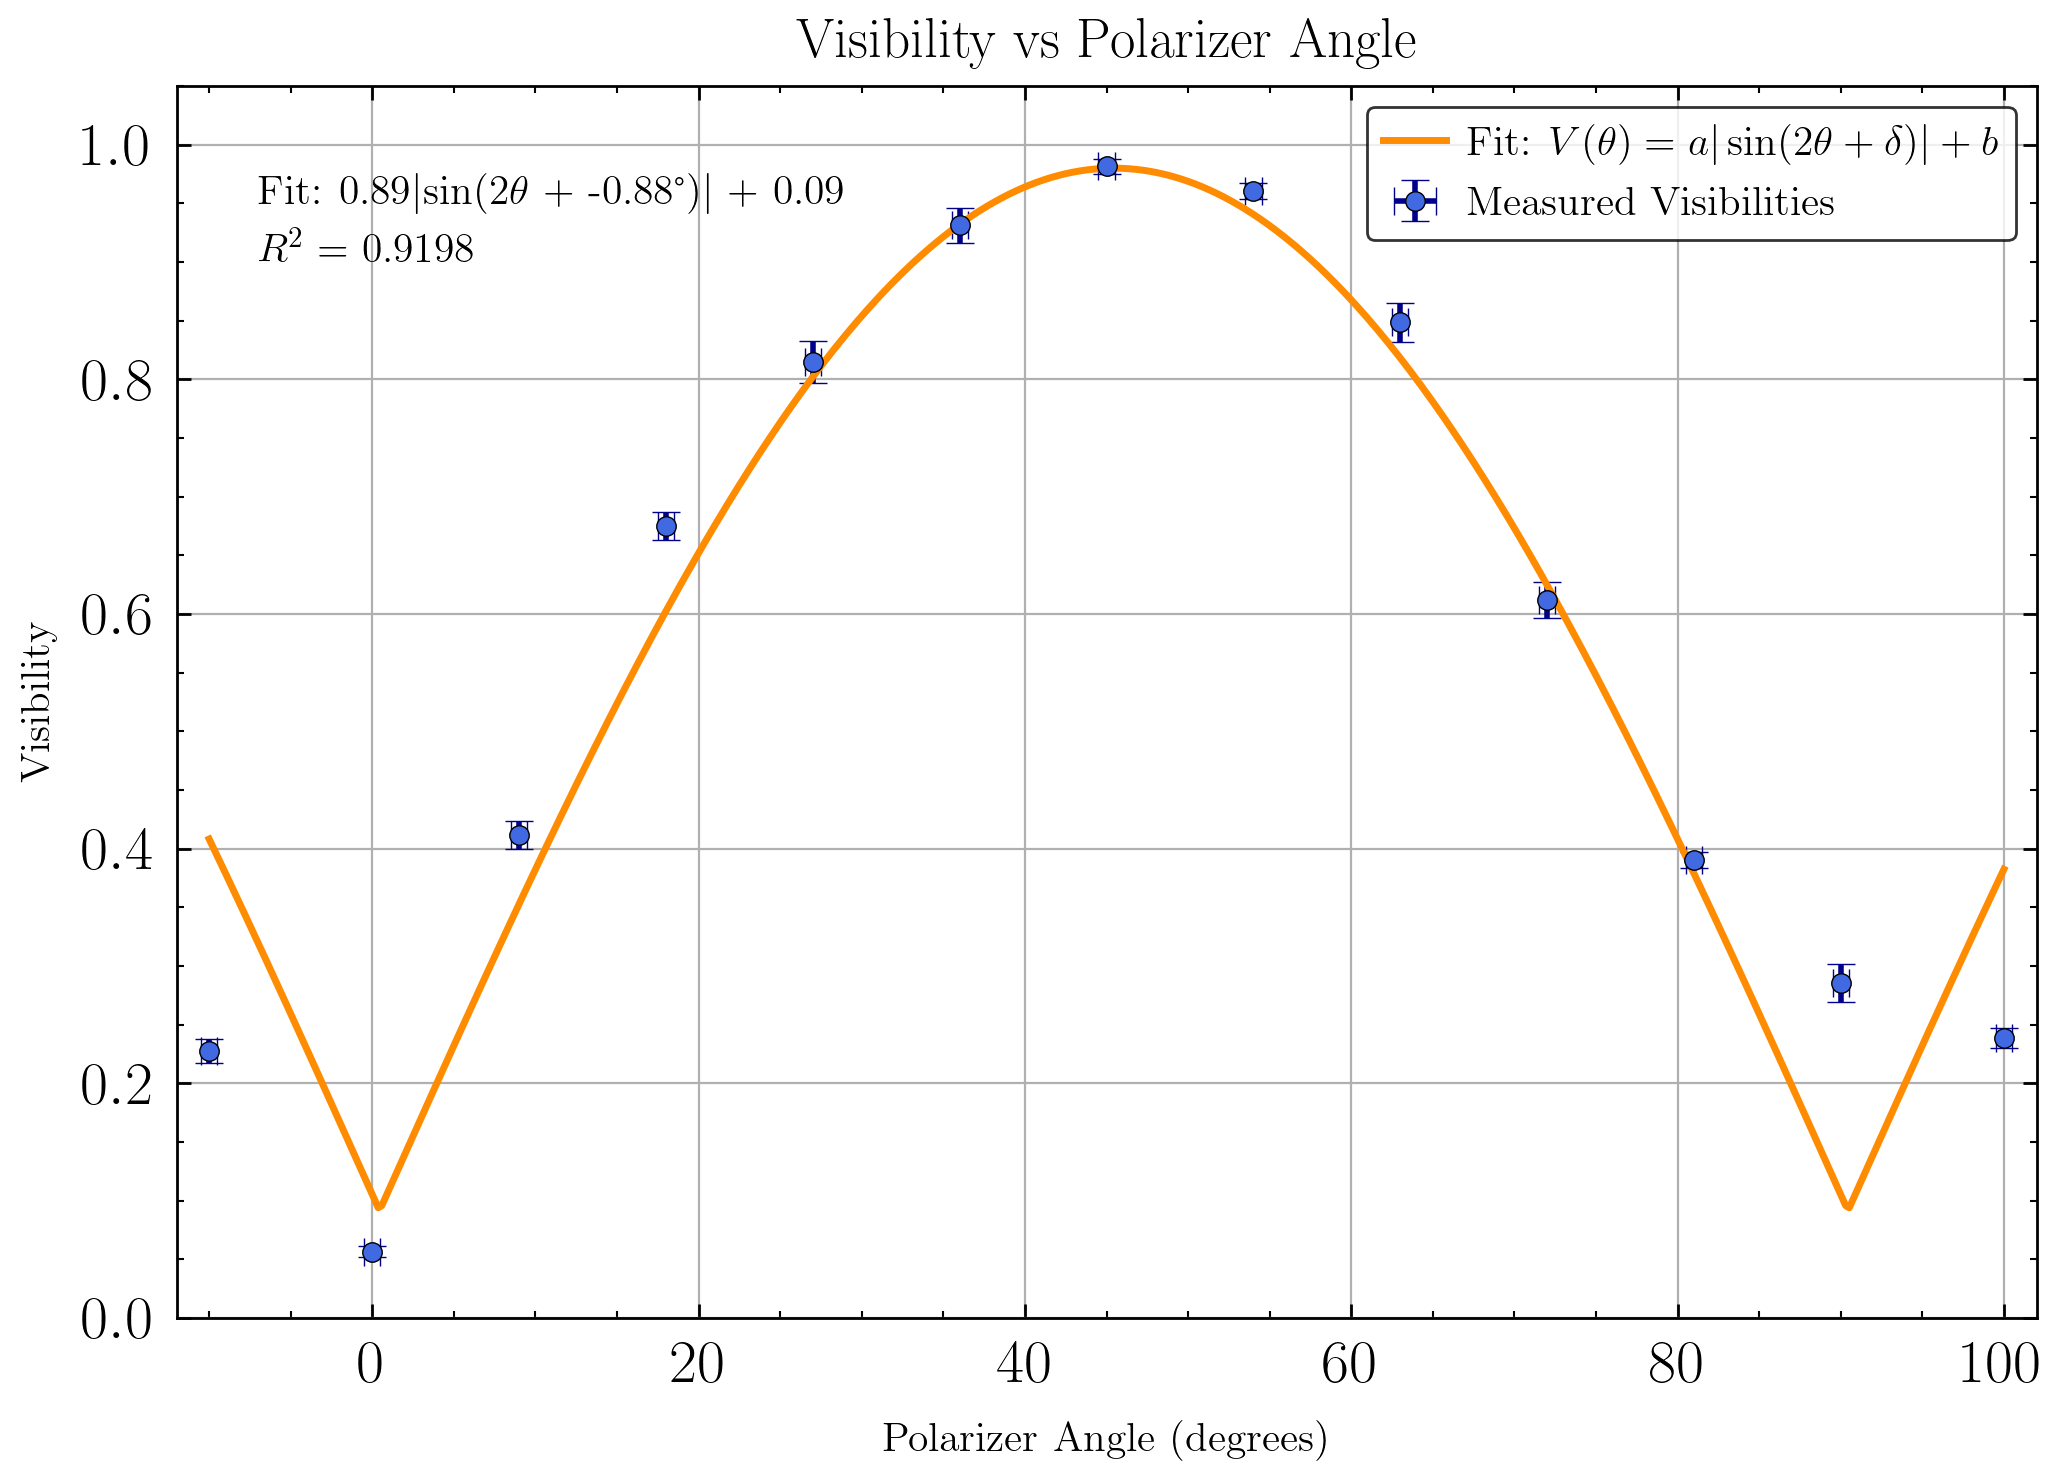

In [4]:
angles = [-10, 0, 9, 18, 27, 36, 45, 54, 63, 72, 81, 90, 100]
visibilities = []
std_visibilities = []
max_intensity = []
min_intensity = []
std_max_intensity = []
std_min_intensity = []
for angle in angles:
    print('Processing angle: {} degrees'.format(angle))
    file_name = '../data/Quantum data/Quantum Eraser/{}degrees.csv'.format(angle)
    qvc = QuantumVisibilityCalculation(file_name)
    qvc.calculate_visibility()
    max_intensity.append(qvc.mean_max)
    min_intensity.append(qvc.mean_min)
    std_max_intensity.append(qvc.mean_sem_max)
    std_min_intensity.append(qvc.mean_sem_min)
    visibilities.append(qvc.visibility)
    std_visibilities.append(qvc.visibility_error)
    
    
    
x_err = 0.5  # degrees
plt.errorbar(angles, visibilities,
                xerr=x_err, 
            yerr=std_visibilities, 
            fmt='o',              # Markers only
            markersize=7,         # Slightly larger markers
            markerfacecolor='royalblue', # A nicer blue
            markeredgecolor='black', # Black edge for clarity
            markeredgewidth=0.5,
            ecolor='darkblue',   # Lighter error bars
            elinewidth=2,         # Thicker error lines
            capsize=5,            # Add caps to error bars
            label='Measured Visibilities')
def curve_analyse_eraser(x, a, b, c):
    return a * np.abs(np.sin(np.pi * x / 90 + c)) + b


popt, pcov = curve_fit(curve_analyse_eraser, angles, visibilities, p0=[1, 0, np.pi/10], maxfev=10000)

x_fit = np.linspace(-10, 100, 500)

# plt.plot(x_fit, curve_analyse_eraser(x_fit, *popt), 'green')  
y_fit = curve_analyse_eraser(x_fit, *popt) 
plt.plot(x_fit, y_fit, 
         color='darkorange',    # A darker green
         linewidth=2.5,        # Thicker line
         label=r'Fit: $V(\theta) = a|\sin(2\theta + \delta)| + b$')
a_fit, b_fit, c_fit = popt
plt.xlabel('Polarizer Angle (degrees)', fontsize=15)
plt.ylabel('Visibility', fontsize=15)
plt.title('Visibility vs Polarizer Angle', fontsize=20)
residuals = visibilities - curve_analyse_eraser(np.array(angles), *popt)    
ss_res = np.sum(residuals**2)
ss_tot = np.sum((visibilities - np.mean(visibilities))**2)
r_squared = 1 - (ss_res / ss_tot)
plt.text(-7, 0.9, f'$R^2$ = {r_squared:.4f}', fontsize=15)
plt.text(-7, 0.95, f'Fit: {a_fit:.2f}$|$sin(2$\\theta$ + {np.rad2deg(c_fit):.2f}°)$|$ + {b_fit:.2f}', fontsize=15)
# delta_deg = np.rad2deg(c_fit) * 2
# plt.text(5, 0.05, f'$\delta$ = {delta_deg:.2f}°', fontsize=20)
plt.grid(True)
plt.title('Visibility vs Polarizer Angle', fontsize=20)
plt.xlim(-12, 102)
plt.ylim(0, 1.05)
plt.legend(fontsize=15)
plt.savefig('../plots/quantum_eraser_visibility_vs_angle_with_fit.png', dpi=1000)
plt.show()


In [ ]:
df = pd.DataFrame({
    'angle_degrees': angles,
    'visibility': visibilities,
    'visibility_error': std_visibilities,
    'max_intensity': max_intensity,
    'min_intensity': min_intensity,
    'max_intensity_error': std_max_intensity,
    'min_intensity_error': std_min_intensity
})
df.to_csv('../data/Quantum data/Quantum Eraser/quantum_eraser_visibility_results.csv', index=False)

<h1> Without Eraser

Processing angle: 0 degrees
Processing angle: 9 degrees
Processing angle: 18 degrees
Processing angle: 27 degrees
Processing angle: 36 degrees
Processing angle: 45 degrees
Processing angle: 54 degrees
Processing angle: 63 degrees
Processing angle: 72 degrees
Processing angle: 81 degrees
Processing angle: 90 degrees
Fitted parameters: [0.92156127 0.0373029  0.04934913]


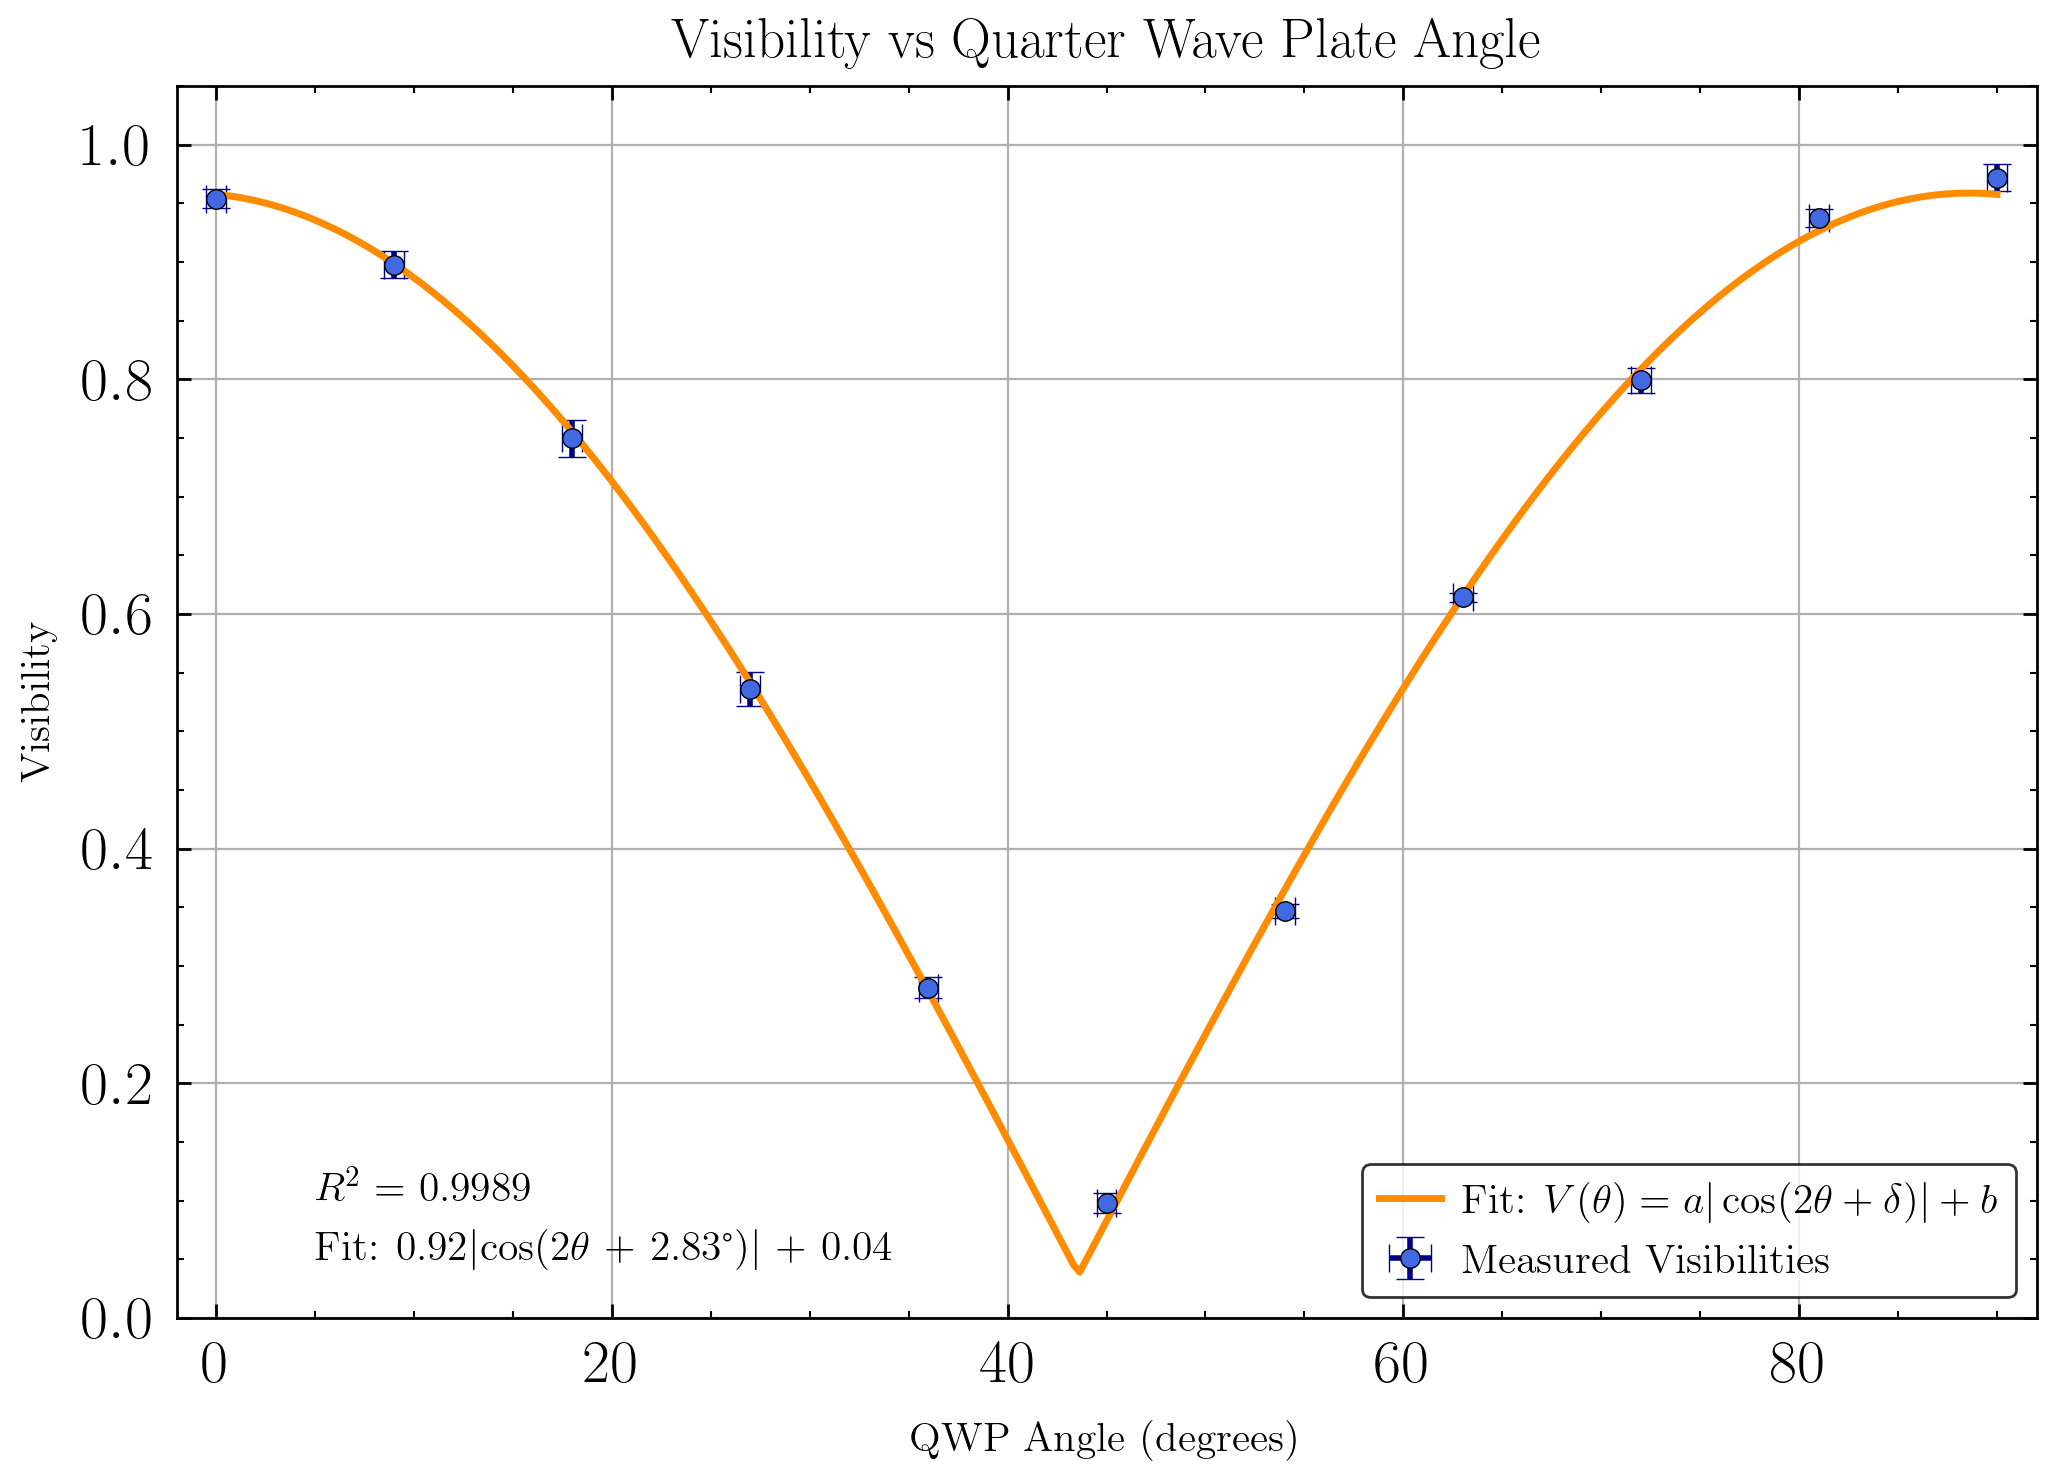

In [5]:
angles = [0, 9, 18, 27, 36, 45, 54, 63, 72, 81, 90]
visibilities = []
x_err = 0.5  # degrees
std_visibilities = []
for angle in angles:
    print('Processing angle: {} degrees'.format(angle))
    file_name = '../data/Quantum data/Quantum No Eraser/{}degrees.csv'.format(angle)
    qvc = QuantumVisibilityCalculation(file_name)
    qvc.calculate_visibility()
    visibilities.append(qvc.visibility)
    std_visibilities.append(qvc.visibility_error)
plt.errorbar(angles, visibilities, 
             xerr=x_err,
             yerr=std_visibilities, 
             fmt='o', 
             markersize=7,
             markerfacecolor='royalblue', 
             markeredgecolor='black',
             markeredgewidth=0.5,
             ecolor='darkblue',
             elinewidth=2,
             capsize=5,
             label='Measured Visibilities')
def curve_analyse(x, a, b, c):
    return a * np.abs(np.cos(np.pi * x / 90 + c)) + b

popt, pcov = curve_fit(curve_analyse, angles, visibilities, p0=[1, 0, np.pi/10], maxfev=10000)
a_fit, b_fit, c_fit = popt
print('Fitted parameters:', popt)
x_fit = np.linspace(0, 90, 300)
y_fit = curve_analyse(x_fit, *popt)

plt.plot(x_fit, y_fit, 
         color='darkorange', # Your chosen color, but a nicer shade
         linewidth=2.5,
         label=r'Fit: $V(\theta) = a|\cos(2\theta + \delta)| + b$')
plt.xlabel('QWP Angle (degrees)', fontsize = 15)
plt.ylabel('Visibility', fontsize = 15)
plt.title('Visibility vs Angle', fontsize=20)

residuals = visibilities - curve_analyse(np.array(angles), *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((visibilities - np.mean(visibilities))**2)
r_squared = 1 - (ss_res / ss_tot)
plt.text(5, 0.1, f'$R^2$ = {r_squared:.4f}', fontsize=15)
plt.text(5, 0.05, f'Fit: {a_fit:.2f}$|$cos(2$\\theta$ + {np.rad2deg(c_fit):.2f}°)$|$ + {b_fit:.2f}', fontsize=15)
plt.legend(fontsize=15)
plt.grid(True)
plt.title('Visibility vs Quarter Wave Plate Angle', fontsize=20)
plt.xlim(-2, 92)
plt.ylim(0, 1.05)
plt.savefig('../plots/quantum_no_eraser_visibility_vs_angle_with_fit.png', dpi=1000)
plt.show()
